# Scikit-Learn notebook
This notebook will start off with an overview of Machine Learning and Scikit-learn and then introducing 3 algorithms from the Scikit-learn library. 
***

# Overview of scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/index.html) (formerly scikits.learn and also known as sklearn) is an open source machine learning library for the Python programming language. It was initially developed by David Cournapeau in 2007. It features a large number of common algorithms,  including classification, regression, clustering and dimensionality reduction algorithms. It is designed to interoperate with the Python numerical and scientific libraries NumPy, Pandas, SciPy and Matplotlib. <br>

In general, **Machine Learning** is about creating models from data. Models are usully divided into 3 groups, namely **supervised learning**, **unsupervised learning** and **reinforcement learning**. Scikit-learn deals with the former two. It provides tools for model fitting, model selection and evaluation. 


## So what is supervised learning and unsupervised learning? 

#### Supervised learning
The data set comes with a column(s) of attribute(s) as target values that we want to predict. For example in the famous Iris dataset, "species" is the attribute we would want the model to predict. Depending on data type of the attribute(s), it is divided into two categories of algorithms, namely classification and regression. 

*  **Classification**: target attributes are in discrete form, with a limited number of categories. Aims to correctly label the target attributes. E.g., correctly label the speicies in Iris dataset
*  **Regression**: target attributes are continuous variables, e.g. prediction of salmon's length as a function of its age and weight.

#### Unsupervised learning
The data set does not come with a column of attribute to be predicted. It aims to identify patterns from the data set. 
*   **Clustering**: aim to discover groups of similar examples within the data
*   **Density estimation**: aim to determine the distribution of data within the sample 
*   **Dimentionality reduction**: project data from high-dimensional space down to 2/3D for the purpose of visualization, summarisation and feature selection. (scikit-learn website)

## Scikit-learn divided their algorithms into 6 categories as follows:

1. Classification
2. Regression
3. Clustering
4. Dimensionality reduction
5. Model selection 
    - Cross validation to check accuracy of supervised models
    - Emsemble methods for combining the predictions of multiple supervised models
6. Preprocessing 
    - Feature extraction to extract features from data to define the attributes in image and text data
    - Feature selection to identify useful attributes to create supervised models

Scikit-learn offers a huge library of algorithms for machine learning task. As Different estimators are better suited for different types of data and different problems, Scikit-learn offers a [guide](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) for users' reference when choosing an estimator. 

# Algorithm 1: Decision Tree - CART

[Decision tree](https://scikit-learn.org/stable/modules/tree.html#) is a **supervised** machine learning algorithm that is easy enough to understand which we probably utilize the idea everyday to make decision. The decision rules are generally in form of if-then-else statements. 

For example I am to decide if I am going to supermarket for grocery today. 
1. I would check if I still have 2 eggs in the fridge? 
    - Yes: I will not go today
    - No: I will proceed to the next question
2. If the weather is calm or windy and rainy? 
    - Calm: I will go
    - Windy and rainy: I am not in the mood to go, I can survive another day with cereal and milk.

Decision tree can also be used in data exploration stage. For example, we are working on a problem where we have information available in hundreds of variables, the decision tree will help to identify most significant variable.<br>

Scikit-learn uses an optimised version of the Classfication and Regression Trees algorithm, **CART** in short. It is a classification algorithm that works for both categorical **(Classification tree)** and continuous **(Regression tree)** dependent variables. 

## What is Classification and Regression Trees (CART) algorithm?

CART algorithm constructs binary trees, which means splitting the data into two heterogeneous groups at every node, using the feature and threshold that yield the largest information gain at each node. Scikit-learn offers Gini’s impurity and Entropy as splitting criteria. 

The algorithm works repeatedly in 4 steps:

1. Find each feature’s best split. 
    - There are many features in a dataset
    - Each feature (categorical or continuous) with n different values and there are (n-1) possible splits. 
    - Find the best split which maximizes the splitting criterion for each feature

2. Find the node’s best split.  
    - That is the feature that best splits or separtes the data.  
    - Among the best splits from Step 1 find the one, which maximizes the splitting criterion.

3. Split the node using best node split from Step 2

4. Repeat from Step 1 until stopping criterion is satisfied.
  - Stopping criterion usually refers to the end node or leaf has a certain amount of data

The deeper the tree (i.e. more nodes), the more complex the rules and fitter the model, which might result in over-fitting.

### Where to split?
In deicison tree, there are four most commonly used measures in deciding the best split. The choice is based on the data type of target variables. They are *Gini Impurity, Information gain, Reduction in Variance and Chi-square*. 

Scikit-learn library offers Gini Impurity and Information gain for classification tree under the module name *DecisionTreeClassifier*. User can change the criterion parameter between "gini" for Gini impurity and "entropy" for information gain, while "gini" is default. 
for Gini impurity and "entropy" for information gain, while "gini" is default. 
```
sklearn.tree.DecisionTreeClassifier(criterion='gini')
```
```
sklearn.tree.DecisionTreeClassifier(criterion='entropy')
```

For regression tree, under the *DecisionTreeRegressor* module, user can set criterion parameter between "mse" (default), "freidman_mse", and "mae" which adopts reduction in variance.
```
sklearn.tree.DecisionTreeRegressor(criterion='square_error')
```

## Decision Tree demostration - wine dataset

We will use the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) built-in in sklearn. The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are 13 different measurements taken for different constituents found in the three types of wine.

The following is a demostration of creating a decision tree model.

**Steps:**
1. Import necessary packages
2. Load the dataset
3. Arrange data as features and target
4. Split the data set into training and testing set
5. Train the model using training set
6. Predict target in testing set with the trained model
7. Evaluate accuracy

In [1]:
# importing required modules
import pandas as pd
import matplotlib.pyplot as plt
# to load built-in wine dataset
from sklearn.datasets import load_wine
# for spliting dataset into test and train data
from sklearn.model_selection import train_test_split
# use Decision tree model, and plotting the tree
from sklearn.tree import plot_tree, DecisionTreeClassifier
# check prediction accuracy
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
# for bagging algorithm
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# load wine data set
wine = load_wine()

# Print out some background, structure and some descriptive statistics of the dataset
# including names of all features and classes
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [3]:
# load the dataset into data frame and have a look
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# arrange data into features and target
x = wine.data
y = wine.target

# split dataset into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

# train the model
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

### Evaluating prediction accuracy
For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score.

In [7]:
# use the model to predict target
prediction = dtc.predict(x_test)

# checking accuracy
accuracy = accuracy_score(prediction,y_test)
matrix = confusion_matrix(y_test,prediction)
report = classification_report(y_test,prediction)

print("Accuracy Score: ", '%.2f'% (accuracy*100),"%")
print("Confusion matrix: ", matrix)
print("classifcation report: ", report)

Accuracy Score:  93.22 %
Confusion matrix:  [[22  1  1]
 [ 0 21  1]
 [ 0  1 12]]
classifcation report:                precision    recall  f1-score   support

           0       1.00      0.92      0.96        24
           1       0.91      0.95      0.93        22
           2       0.86      0.92      0.89        13

    accuracy                           0.93        59
   macro avg       0.92      0.93      0.93        59
weighted avg       0.94      0.93      0.93        59



The confusion matrix showed that in 59 test data, the model misclassified 4 of them. Accuracy is 93.22% which is not too bad. 

### Visualizing the decision tree

[Text(523.125, 1261.9285714285713, 'flavanoids <= 0.975\ngini = 0.657\nsamples = 119\nvalue = [35, 49, 35]\nclass = class_1'),
 Text(348.75, 1067.7857142857142, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = class_2'),
 Text(697.5, 1067.7857142857142, 'proline <= 760.0\ngini = 0.548\nsamples = 90\nvalue = [35, 49, 6]\nclass = class_1'),
 Text(348.75, 873.6428571428571, 'od280/od315_of_diluted_wines <= 1.505\ngini = 0.23\nsamples = 54\nvalue = [1, 47, 6]\nclass = class_1'),
 Text(174.375, 679.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = class_2'),
 Text(523.125, 679.5, 'alcohol <= 14.1\ngini = 0.079\nsamples = 49\nvalue = [1, 47, 1]\nclass = class_1'),
 Text(348.75, 485.3571428571429, 'malic_acid <= 3.925\ngini = 0.041\nsamples = 48\nvalue = [1, 47, 0]\nclass = class_1'),
 Text(174.375, 291.2142857142858, 'gini = 0.0\nsamples = 44\nvalue = [0, 44, 0]\nclass = class_1'),
 Text(523.125, 291.2142857142858, 'malic_acid <= 4.14\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]

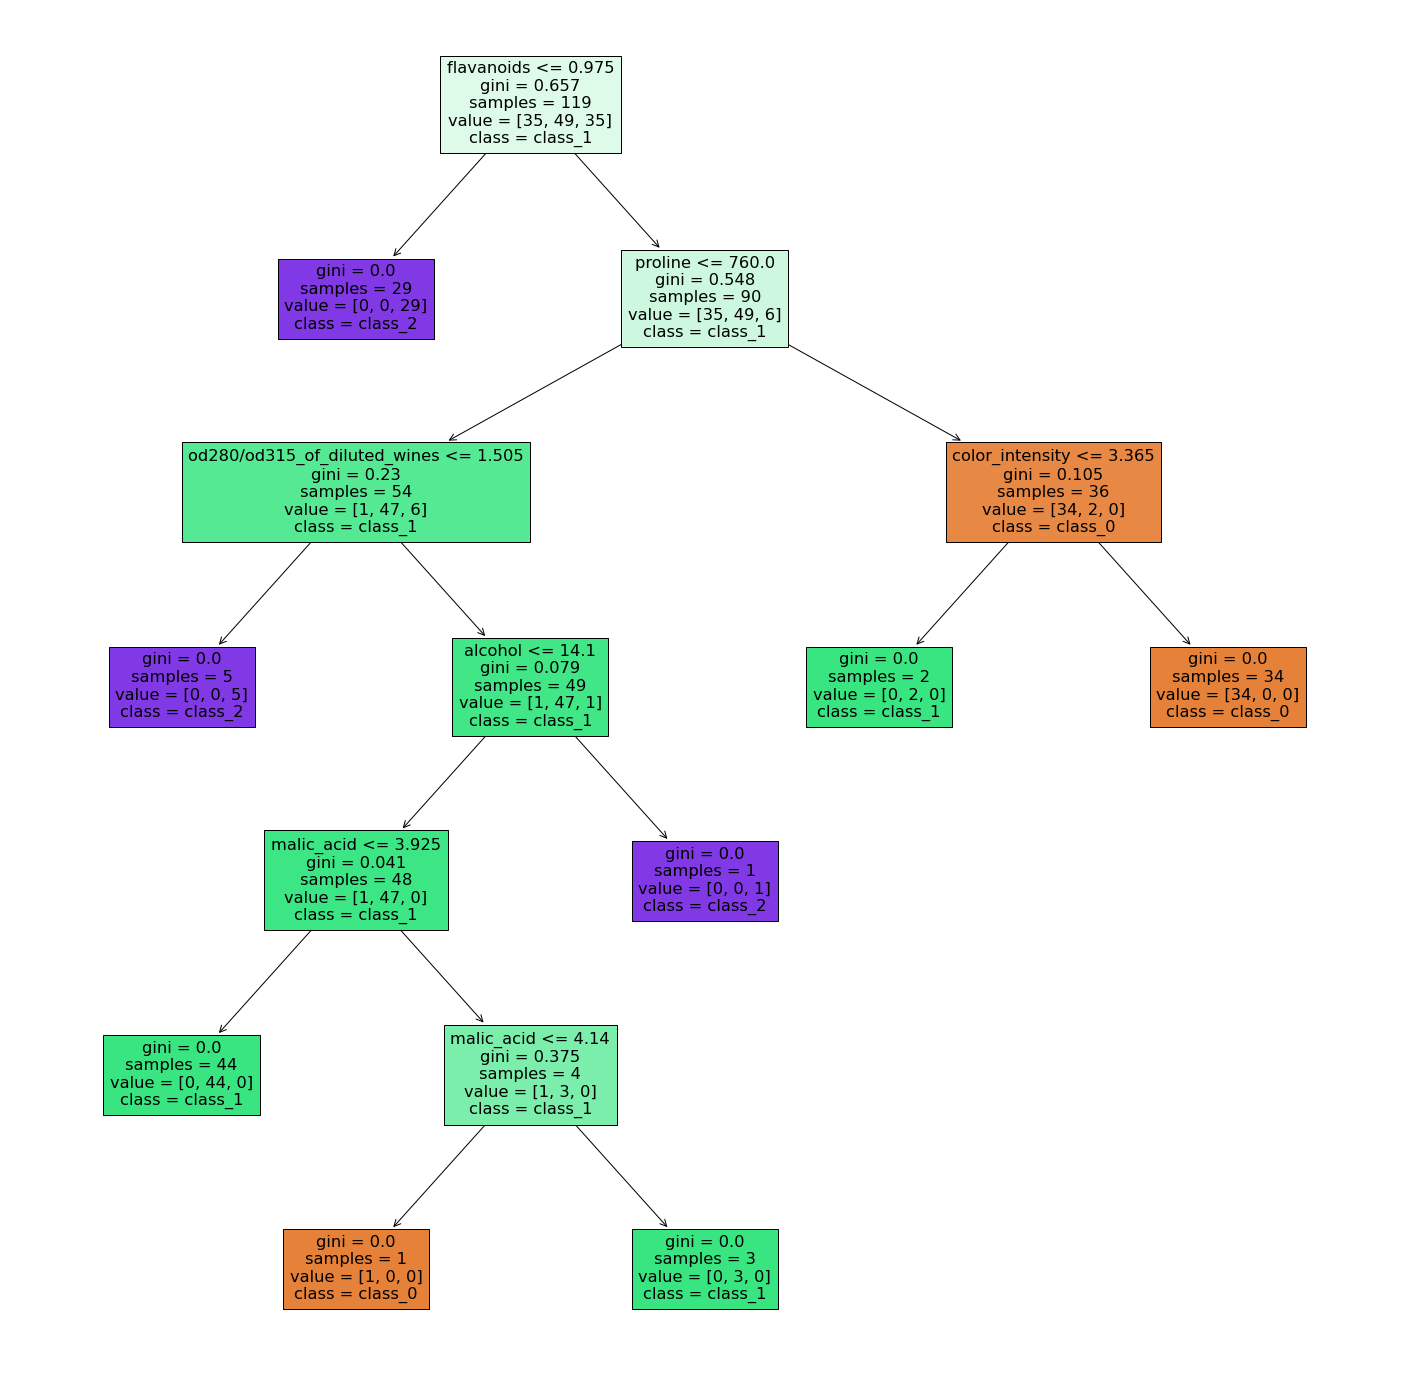

In [8]:
# plot the classifier tree
plt.figure(figsize=(25,25))
plot_tree(dtc, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)

### Interpretation

The resulted decision tree has the root node as level of flavanoid. If flavanoid level is 0.975 or less, the prediction is the wine is from class 2, else go on to look at other features. The second node is level of proline. If proline level is 760.0 or less, go to the left side, else go to the right side. This goes on until reaching last node, which is a leaf and gives a prediction of class. 

***

# Algorithm 2 - Bootstrap Aggregating/ Bagging

[Bootstrap aggregating](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) also called bagging is an ensemble algorithm, which consists of two parts, bootstrap sampling and aggregating as the name suggested. It is a meta-technique that uses multiple classifiers to improve predictive accuracy. Users can use any model of their choice, not only decision tree. For example user can create a model with a combination of KNN, linear regression and SVM, or several decision trees which is also called bagged trees. 

The algorithm:
1. Bootstrap means to randomly select samples from the training dataset with replacement to make it same size as the dataset and then train a model on each set of samples, in order to reduce variance.

2. Aggregation means to statistically combine the predictions of the all trained models by voting (classification) or averaging(regression). 

## Demostration of Bootstrap Aggregating

Scikit-learn allows user to use a variety of base estimators in bagging classifier. The following demostrate and compare accuracy of using different base estimators. 

Setting base estimator

In [11]:

# if base_estimator=None default to decision tree
dt_bagging = BaggingClassifier(base_estimator=None, n_estimators=50, random_state=12)
svc_bagging = BaggingClassifier(base_estimator=SVC(), n_estimators=50, random_state=12)
knn_bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=12)
random_forest = RandomForestClassifier(n_estimators=50, random_state=12)

Train models with different base estimators and then evaluate the accuracy.

In [14]:
# train using different estimators and evaluate
#dt
dt_bagging.fit(x_train, y_train)
dt_bagging.predict(x_test)
bdt_prediction = dt_bagging.predict(x_test)
dt_results = accuracy_score(y_test,bdt_prediction)
print("Bagged decision tree accuracy: ", '%.2f'% (dt_results*100),"%")
#svc
svc_bagging.fit(x_train, y_train)
svc_bagging.predict(x_test)
svc_prediction = svc_bagging.predict(x_test)
svc_results = accuracy_score(y_test,svc_prediction)
print("Bagged SVC accuracy: ", '%.2f'% (svc_results*100),"%")
#knn
knn_bagging.fit(x_train, y_train)
knn_bagging.predict(x_test)
knn_prediction = knn_bagging.predict(x_test)
knn_results = accuracy_score(y_test,knn_prediction)
print("Bagged KNN accuracy: ", '%.2f'% (knn_results*100),"%")

Bagged decision tree accuracy:  96.61 %
Bagged SVC accuracy:  69.49 %
Bagged KNN accuracy:  62.71 %


***

# Algorithm 3: Random Forest

[Random forest](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees) is a **supervised machine learning algorithm** based on ensemble learning and an evolution of Breiman’s original bagging algorithm. It’s a great improvement over bagged decision trees as Breiman added an additional random variation into the bagging procedure, creating greater diversity amongst the resulting models. 

Random forests differs from bagged trees by forcing the tree to use only a subset of its available features to split on in the growing phase. All the decision trees that make up a random forest are different because each tree is built on a different random subset of data and different random subset of features. The decision trees built are then aggregated to get an accurate results. In short, random forest uses the concepts of bagging and added additional random sampling of features. The number of features sampled, and number of trees to be built are tuning parameters of the algorithm.

Random forest can perform classification, as well as regression. Because it builds a great diversity of trees which in turn minimizes overfitting.It tends to be more accurate than a single decision tree.


## Random forest algorithm

1. Create a bootstrapped dataset that is the same size as the training dataset
2. Build a decision tree using the bootstrapped dataset but only use a random subset of *variables* at each step instead of all variables
3. Back to step 1 and repeat a set number of times, let's say 100 times
4. A random forest with 100 different decision trees is built

Then...
  -  Run the model on the out-of-bag dataset (testing dataset), i.e. performing classification (voting) or regression (averaging)
  
  -  Evaluating accuracy 


## Demostration of Random Forest using wine dataset

In [15]:
wine = load_wine()
x = wine.data
y = wine.target

# split into train and test data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=12)

# train the model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [17]:
# use the model to predict
prediction = rfc.predict(x_test)

#checking accuracy
accuracy = accuracy_score(prediction,y_test)
con_matrix = confusion_matrix(y_test,prediction)
report = classification_report(y_test,prediction)
print("Accuracy: ", '%.2f'% (accuracy*100),"%")
print(con_matrix)
print(report)

Accuracy:  98.31 %
[[23  0  0]
 [ 0 18  1]
 [ 0  0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.95      0.97        19
           2       0.94      1.00      0.97        17

    accuracy                           0.98        59
   macro avg       0.98      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



# Conclusion

The confusion matrix showed that from 59 test data, the resulted random forest model misclassified only 1. The accuracy is 98.31% which is pretty good. 

In terms of accuracy, the performance tends to rise from a single decision tree, to bagged decision trees and random forest performs the best in classification. 

# Reference:

[1] https://en.wikipedia.org/wiki/Scikit-learn <br>
[2] https://towardsdatascience.com/machine-learning-algorithms-in-laymans-terms-part-2-a0a74df9a9ac <br>
[3] https://en.wikipedia.org/wiki/Decision_tree_learning <br>
[4] https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier <Br>
[5] https://www.analyticsvidhya.com/blog/2016/04/tree-based-algorithms-complete-tutorial-scratch-in-python/ <br>
[6] https://scikit-learn.org/stable/modules/ensemble.html#bagging <br>
[7] http://www.differencebetween.net/technology/difference-between-bagging-and-random-forest/#ixzz7F0pofHW2 <br>
[8] https://builtin.com/data-science/random-forest-algorithm <br>
[9] https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76 <br>
[10] https://www.datacamp.com/community/tutorials/random-forests-classifier-python <br>
[11] https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/ <br>
[12] https://scikit-learn.org/stable/tutorial/basic/tutorial.html <br>
[13] https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics <br>
[14] https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56 


***
# End